In [17]:
import numpy as np
# import plotly
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import stackview

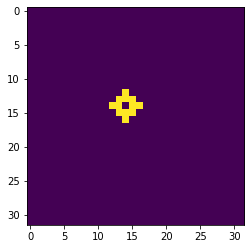

In [3]:
DATA_PATH = "/mnt/efs/shared_data/restorators/spheres"
obj = tifffile.imread(DATA_PATH + '/objects/0001_sphere.tiff')
delta_n = obj[0, ...]
optic_axis = obj[1:, ...]
plt.imshow(delta_n[4, ...])
plt.show(block=True)
plt.pause(0.2)

In [4]:
%%html
<style>
.python-iframe > iframe {
  height:1000px !important;
}
</style>

In [5]:
%%html
<style>
.python-iframe > iframe {
  height:1000px !important;
}
</style>

In [6]:
stackview.slice(delta_n, continuous_update=True, zoom_factor=10)

In [7]:
# from ipywidgets import Image
# img_delta = Image(value=delta_n[4, ...])

In [8]:
# delta_n.layout.width = '100%'

AttributeError: 'numpy.ndarray' object has no attribute 'layout'

In [9]:
stackview.orthogonal(delta_n, continuous_update=True, zoom_factor=10)

In [ ]:
optic_axis[:, 3, 14, 16]

array([ 0.,  0., -1.], dtype=float32)

In [ ]:
stackview.orthogonal(optic_axis[0], continuous_update=True, zoom_factor=10)

In [ ]:
stackview.orthogonal(optic_axis[1], continuous_update=True, zoom_factor=10)

In [ ]:
stackview.orthogonal(optic_axis[2], continuous_update=True, zoom_factor=10)

In [30]:
'''Script to test a trained model on the set of birefringence data'''
import torch
from Data import BirefringenceDataset
from model_bir import BirNetwork

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"using {device} device")

saved_model_dir = "/mnt/efs/shared_data/restorators/models_bir/"

DATA_PATH = "/mnt/efs/shared_data/restorators/spheres"
test_data = BirefringenceDataset(DATA_PATH, split='test')
testloader = torch.utils.data.DataLoader(test_data, batch_size=1,
                                         shuffle=False, num_workers=2)

# model_relu = BirNetwork().to(device)
# model_relu.eval()
# weights_relu = torch.load(saved_model_dir + 'sphere128.pt')
# model_relu.load_state_dict(weights_relu)

# model_leaky = BirNetwork().to(device)
# model_leaky.eval()
# weights_leaky = torch.load(saved_model_dir + 'sphere_9_2_epoch67.pt')
# model_leaky.load_state_dict(weights_leaky)

# model_normed = BirNetwork().to(device)
# model_normed.eval()
# weights_normed = torch.load(saved_model_dir + 'sphere_9_3_norm/norm_final.pt')
# model_normed.load_state_dict(weights_normed)

model_normed_ker5 = BirNetwork().to(device)
model_normed_ker5.eval()
weights_normed_ker5 = torch.load(saved_model_dir + 'sphere_9_3_norm_ker5/norm_final.pt')
model_normed_ker5.load_state_dict(weights_normed_ker5)

data_pair = test_data[0]
source = data_pair[0]
source = source.unsqueeze(axis=0).to(device)
# source1 = source1
with torch.no_grad():
    # target_pred_relu = model_relu(source).cpu()
    # target_pred_leaky = model_leaky(source).cpu()
    # target_pred_normed = model_normed(source).cpu()
    target_pred_normed_ker5 = model_normed_ker5(source).cpu()

using cuda device


In [ ]:
pred = target_pred_relu.squeeze(axis=0)
delta_pred_relu = pred[0, ...].detach().numpy()
stackview.orthogonal(delta_pred_relu, continuous_update=True, zoom_factor=10)

In [ ]:
target_pred_leaky.shape

torch.Size([1, 4, 8, 32, 32])

In [ ]:
pred = target_pred_leaky.squeeze(axis=0)
target_pred_leaky = pred[0, ...].detach().numpy()
stackview.orthogonal(target_pred_leaky, continuous_update=True, zoom_factor=10)

In [ ]:
pred = target_pred_normed.squeeze(axis=0)
target_pred_normed = pred[0, ...].detach().numpy()
stackview.orthogonal(target_pred_normed, continuous_update=True, zoom_factor=10)

In [10]:
target = data_pair[1]
delta_gt = target[0, ...].detach().numpy()
stackview.orthogonal(delta_gt, continuous_update=True, zoom_factor=10)

In [ ]:
pred = target_pred_leaky.squeeze(axis=0)
delta_pred_leaky = pred[0, ...].detach().numpy()
stackview.orthogonal(delta_pred_leaky, continuous_update=True, zoom_factor=10)

In [ ]:
np.max(delta_pred_leaky)

0.020374032

In [5]:
target_pred_normed_ker5.shape

(8, 32, 32)

In [6]:
# pred = target_pred_normed_ker5.squeeze(axis=0)
target_pred_normed_ker5_bir = pred[0, ...].detach().numpy()
stackview.orthogonal(target_pred_normed_ker5_bir, continuous_update=True, zoom_factor=10)

In [9]:
# import os
# os.makedirs('../inference/round1/')

In [36]:
prediction = target_pred_normed_ker5.squeeze(axis=0).numpy()
gt = target.numpy()

In [39]:
gt.shape

(4, 8, 32, 32)

In [40]:
imwrite(f"../inference/round1/pred.tiff", prediction)
imwrite(f"../inference/round1/gt.tiff", gt)

In [ ]:
import skimage.metrics

In [ ]:
psnr = skimage.metrics.peak_signal_noise_ratio(delta_gt, delta_pred_leaky, data_range=None)

In [ ]:
psnr

62.611342822709574

In [ ]:
psnr = skimage.metrics.peak_signal_noise_ratio(delta_gt, delta_pred_relu, data_range=None)

In [ ]:
psnr

20.65226410920985

In [ ]:
np.max(delta_gt)

0.007911835

In [ ]:
np.max(delta_pred_relu)

0.5410269

In [ ]:
np.median(delta_pred_relu)

0.010857783